In [49]:
import pandas as pd
import numpy as np
import plotly.express as px

EDA for portugal marketing campaign

In [50]:
df = pd.read_csv("../data/Clean/bank.csv",sep=';')

In [51]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [52]:
columns = list(df.columns)

Correlation betwen numerical values

In [53]:
df.corr() # we see quite high correlation between target var y and pdays, and nr.employed

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001051,-0.033549,0.021962,0.002000,0.000497,0.129099,0.012775,-0.014936,0.028163
campaign,0.001051,1.000000,0.056962,-0.085363,0.159517,0.128932,-0.013732,0.143729,0.153597,-0.073113
pdays,-0.033549,0.056962,1.000000,-0.588948,0.273779,0.080213,-0.093317,0.300044,0.375708,-0.324865
previous,0.021962,-0.085363,-0.588948,1.000000,-0.421873,-0.203609,-0.048894,-0.456428,-0.503003,0.229293
emp.var.rate,0.002000,0.159517,0.273779,-0.421873,1.000000,0.776540,0.185194,0.971859,0.905242,-0.297782
cons.price.idx,0.000497,0.128932,0.080213,-0.203609,0.776540,1.000000,0.053241,0.687362,0.519368,-0.136803
cons.conf.idx,0.129099,-0.013732,-0.093317,-0.048894,0.185194,0.053241,1.000000,0.268403,0.090996,0.057831
euribor3m,0.012775,0.143729,0.300044,-0.456428,0.971859,0.687362,0.268403,1.000000,0.944614,-0.307617
nr.employed,-0.014936,0.153597,0.375708,-0.503003,0.905242,0.519368,0.090996,0.944614,1.000000,-0.353966
y,0.028163,-0.073113,-0.324865,0.229293,-0.297782,-0.136803,0.057831,-0.307617,-0.353966,1.000000


In [54]:
total = df.shape[0]

In [55]:
df_job = df.groupby(["job","y"]).housing.count().round(2).reset_index()
df_job['perc'] = df_job['housing']/total*100 

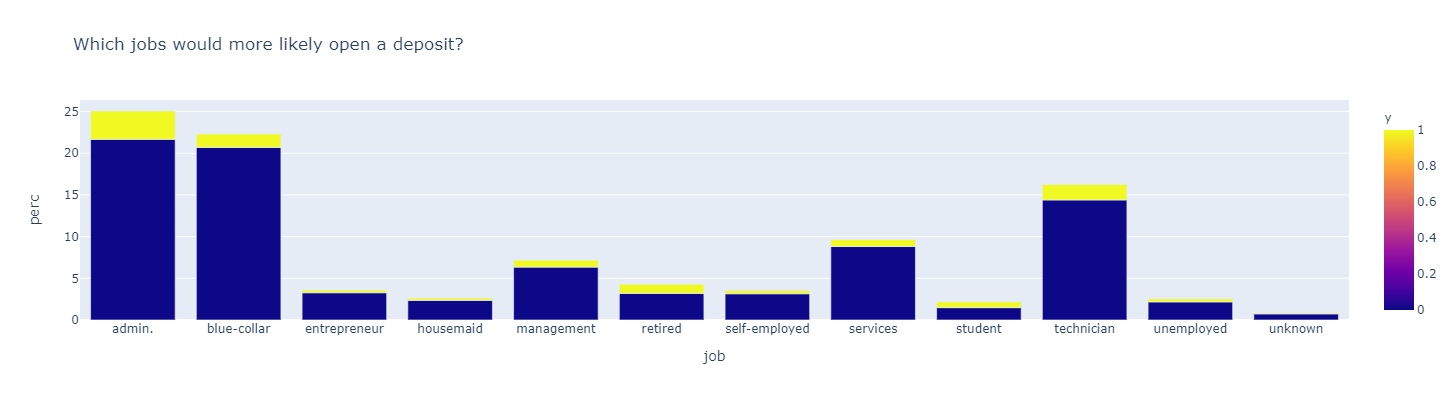

In [61]:
px.bar(data_frame=df_job,x="job",y="perc",color="y",orientation="v",title="Which jobs would more likely open a deposit?", height=400,width=800)

Admins wuld most likely open a deposit. Interesting is also that entrepreneurs wouldn't so likely open a deposit.

In [69]:
df_marital_edu = df.groupby(["marital","education","y"]).housing.count().round(2).reset_index()
df_marital_edu['perc'] = df_marital_edu['housing']/total*100 
df_marital_edu = df_marital_edu[df_marital_edu.y == 1]

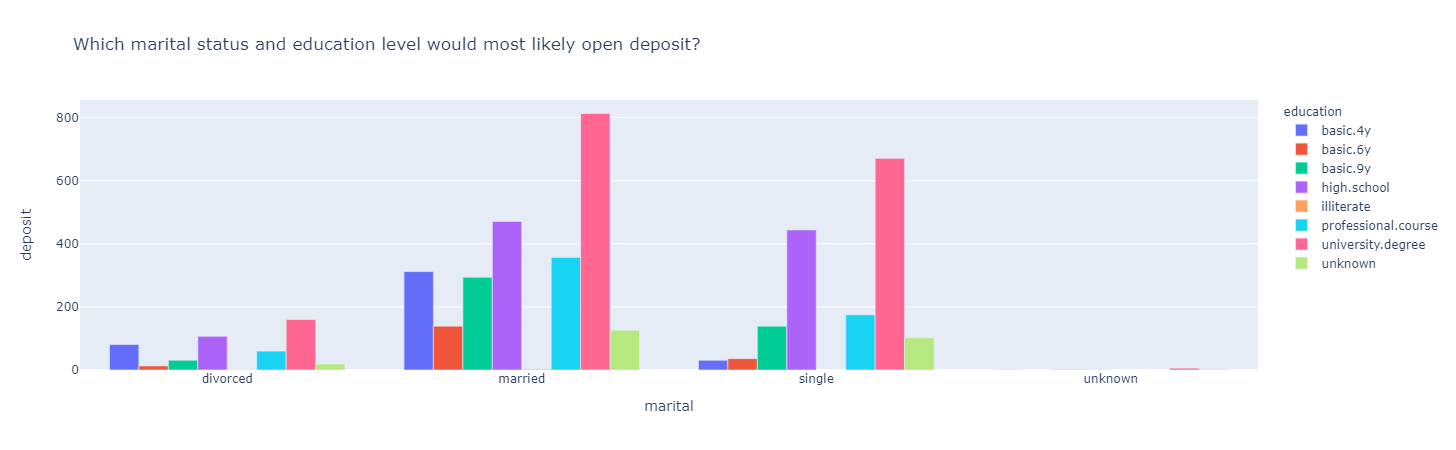

In [70]:
px.bar(data_frame=df_marital_edu,x="marital",y="housing",color = "education",barmode="group",title="Which marital status and education level would most likely open deposit?",labels={'housing':'deposit'})

Married university degree persons would most likely open a deposit.

In [77]:
df_housing_loan = df.groupby(["housing","loan","y"]).contact.count().round(2).reset_index()
df_housing_loan['perc'] = df_housing_loan['contact']/total*100 
df_housing_loan = df_housing_loan[df_housing_loan.y == 1]

In [78]:
df_housing_loan

,housing,loan,y,contact,perc
1,no,no,1,1737,4.432140
3,no,yes,1,274,0.699140
5,unknown,unknown,1,107,0.273022
7,yes,no,1,2071,5.284377
9,yes,yes,1,408,1.041055


Intresting is that persons with housing loan and without personal loan would more likely open a deposit than people without any loan.

In [87]:
df_dow = df.groupby(["day_of_week","y"]).housing.count().round(2).reset_index()
df_dow['perc'] = df_dow['housing']/total*100 
df_dow = df_dow[df_dow.y == 1]

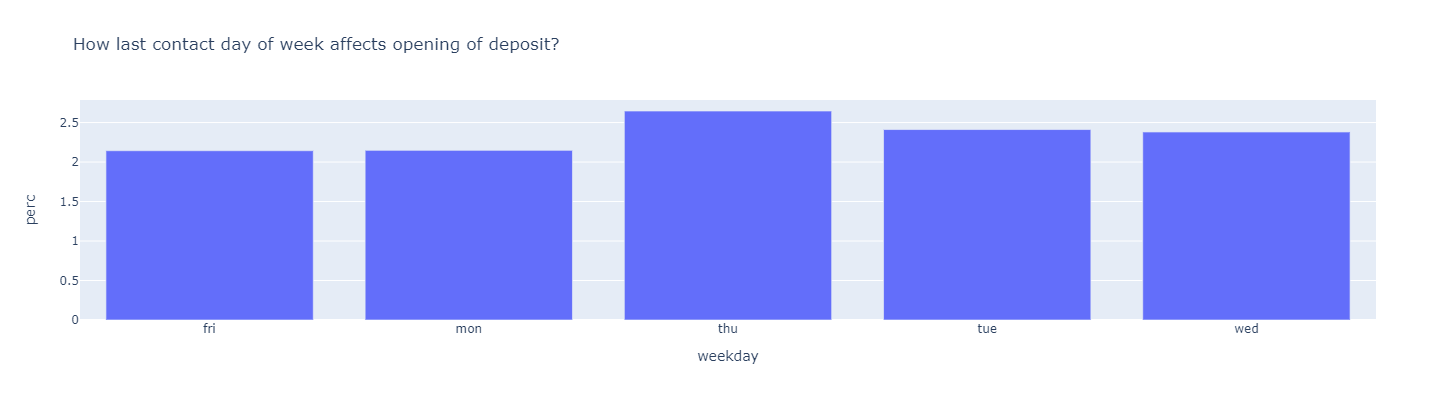

In [90]:
px.bar(data_frame=df_dow,x="day_of_week",y="perc",orientation="v",title="How last contact day of week affects opening of deposit?", height=400,width=800,labels={'day_of_week':'weekday'})

Slightly more likely is that person who had last contact on Thursday would open a deposit.

In [107]:
df_previous = df.groupby(["poutcome","y"]).contact.count().round(2).reset_index()
df_previous['perc'] = df_previous['contact']/total*100 
df_previous = df_previous[df_previous.poutcome != "nonexistent"]

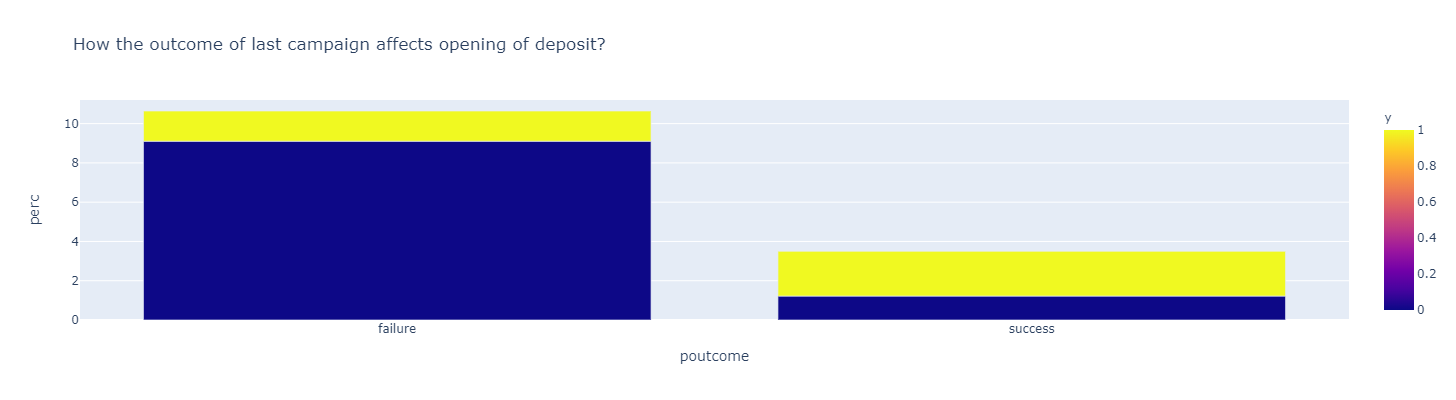

In [108]:
px.bar(data_frame=df_previous,x="poutcome",y="perc",color="y",orientation="v",title="How the outcome of last campaign affects opening of deposit?", height=400,width=800)

It more likely of opening deposit with previous succesfull campaign.